In [2]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import spearmanr

#######################################################
from scipy.stats import spearmanr

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

from xgboost import XGBClassifier
from sklearn import tree
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import accuracy_score

#from xgboost import XGBClassifier
#import xgboost as xgb



In [3]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [4]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [5]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [6]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [7]:
# Data Preperation Module 1
# m1ml,m1mg,
# Import first Lecturer Grades

#module1lg = pd.read_csv('Module1-LecturersGrades.csv',index_col = 'Student Id')
# Index column is student ID
# Student ID -> module1lg
module1lg = pd.read_csv('Module1-LecturersGrades.csv')

In [8]:
# module1mg = pd.read_csv('Module1-MoodleGrades.csv', index_col = 'ID number')
# ID number is primary index col

# Index column is privalged column in pandas providing conviement to series or dataframe rows
module1mg = pd.read_csv('Module1-MoodleGrades.csv')
# Module 1 mg has 4,5,6,7, MCQ Final

In [9]:
# Data prep Module 1
module1ml = pd.read_csv('Module1-MoodleLogs.csv')
# Module logs

In [10]:
module1lg.dtypes
# id is int

id                     int64
Student Id            object
Name                  object
% CA                   int64
% exam                 int64
Average              float64
Final(Rounded Up)      int64
dtype: object

In [11]:
module1mg.dtypes
# Mostly floats and ints
# ID number to change to int

First name                                      object
Surname                                         object
ID number                                       object
Email address                                   object
Course total (Real)                            float64
Last downloaded from this course                 int64
Assignment: Group 1 - Practical Test (Real)      int64
Assignment: Group 2 - Practical Test (Real)      int64
Assignment: Group 3 - Practical Test (Real)      int64
Assignment: Group 4 - Practical Test (Real)      int64
Assignment: Group 5 - Practical Test (Real)      int64
Assignment: Group 6 - Practical Test (Real)      int64
Assignment: Group 7 - Practical Test (Real)      int64
Assignment: Late Practical (Real)                int64
Quiz: Group 1 MCQ (Real)                         int64
Quiz: Group 1 - MCQ2 (Real)                      int64
Quiz: Group 2 MCQ (Real)                         int64
Quiz: Group 2 - MCQ2 (Real)                      int64
Quiz: Grou

In [12]:
module1ml.dtypes
# Are all objects
# Need to split strings

Time              object
User full name    object
Affected user     object
Event context     object
Component         object
Event name        object
Description       object
Origin            object
IP address        object
dtype: object

In [13]:
# Engaged

#Engaged1mg = > 55
disengaged1mg = module1mg['Course total (Real)'] < 55


In [14]:
disengaged1mg.sum()

97

In [15]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module1mg['disengaged'] = np.where(module1mg['Course total (Real)']<=55, '1', '0')

In [16]:
module1mg['disengaged'] = pd.to_numeric(module1mg['disengaged'])


In [17]:
module1mg.dtypes

First name                                      object
Surname                                         object
ID number                                       object
Email address                                   object
Course total (Real)                            float64
Last downloaded from this course                 int64
Assignment: Group 1 - Practical Test (Real)      int64
Assignment: Group 2 - Practical Test (Real)      int64
Assignment: Group 3 - Practical Test (Real)      int64
Assignment: Group 4 - Practical Test (Real)      int64
Assignment: Group 5 - Practical Test (Real)      int64
Assignment: Group 6 - Practical Test (Real)      int64
Assignment: Group 7 - Practical Test (Real)      int64
Assignment: Late Practical (Real)                int64
Quiz: Group 1 MCQ (Real)                         int64
Quiz: Group 1 - MCQ2 (Real)                      int64
Quiz: Group 2 MCQ (Real)                         int64
Quiz: Group 2 - MCQ2 (Real)                      int64
Quiz: Grou

In [18]:
print (module1mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Group 1 - Practical Test (Real)', 'Assignment: Group 2 - Practical Test (Real)', 'Assignment: Group 3 - Practical Test (Real)', 'Assignment: Group 4 - Practical Test (Real)', 'Assignment: Group 5 - Practical Test (Real)', 'Assignment: Group 6 - Practical Test (Real)', 'Assignment: Group 7 - Practical Test (Real)', 'Assignment: Late Practical (Real)', 'Quiz: Group 1 MCQ (Real)', 'Quiz: Group 1 - MCQ2 (Real)', 'Quiz: Group 2 MCQ (Real)', 'Quiz: Group 2 - MCQ2 (Real)', 'Quiz: Group 3 MCQ (Real)', 'Quiz: Group 3 - MCQ2 (Real)', 'Quiz: Group 4 MCQ (Real)', 'Quiz: Group 4 - MCQ2 (Real)', 'Quiz: Group 5 MCQ (Real)', 'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)', 'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)', 'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'Quiz: Late MCQ2 (Real)', 'disengaged']


In [19]:
module1mg.head(2)

First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                46.67   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                36.67   

   Last downloaded from this course  \
0                        1550739556   
1                        1550739556   

   Assignment: Group 1 - Practical Test (Real)  \
0                                            0   
1                                            0   

   Assignment: Group 2 - Practical Test (Real)  \
0                                            0   
1                                            0   

   Assignment: Group 3 - Practical Test (Real)  \
0                                            0   
1                                            0   

   Assignment: Group 4 - Practical Test (Real)     ...      \
0                                            0     ...       
1                                            0     ...       

   Quiz: Group 4 - MCQ2 (Real)  Quiz: Group 5 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 6 - MCQ2 (Real)  Quiz: Group 7 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 7 - MCQ2 (Real)  Quiz: Late MCQ1 (Real)  \
0                            0                       0   
1                            0                       0   

   Quiz: Late MCQ2 (Real)  disengaged  
0                       0           1  
1                       0           1  

[2 rows x 31 columns]

In [19]:
# Selecting columns
# Columns1mg
m1mg = module1mg[['First name', 'Surname','ID number','Course total (Real)','Quiz: Group 1 MCQ (Real)', 'Quiz: Group 1 - MCQ2 (Real)', 'Quiz: Group 2 MCQ (Real)', 'Quiz: Group 2 - MCQ2 (Real)', 'Quiz: Group 3 MCQ (Real)', 'Quiz: Group 3 - MCQ2 (Real)', 'Quiz: Group 4 MCQ (Real)', 'Quiz: Group 5 MCQ (Real)', 'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)', 'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)', 'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'disengaged']]

m1mg

In [20]:
m1mg

First name Surname ID number  Course total (Real)  \
0         a8NM    bDqB  U8NMDqBG                46.67   
1         aSnR    bGk9  VSnRGk9O                36.67   
2         aAK5    bSAb  tAK5SAbE                53.33   
3         a4jV    bO8M  14jVO8M7                 0.00   
4         aa14    bMdv  ba14Mdv9                46.67   
..         ...     ...       ...                  ...   
117       ak8R    bBNX  9k8RBNXk                73.33   
118       a1de    bNfO  c1deNfOy                53.33   
119       afY5    bOiK  bfY5OiKA                70.00   
120       aXIv    b1jf  5XIv1jfi                43.33   
121       aiG1    bhcI  GiG1hcIK                60.00   

     Quiz: Group 1 MCQ (Real)  Quiz: Group 1 - MCQ2 (Real)  \
0                           0                            0   
1                           5                            6   
2                           0                            0   
3                           0                            0   
4                           0                            7   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         0                            0   
121                         0                            0   

     Quiz: Group 2 MCQ (Real)  Quiz: Group 2 - MCQ2 (Real)  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         8                            5   
121                         0                            0   

     Quiz: Group 3 MCQ (Real)  Quiz: Group 3 - MCQ2 (Real)  \
0                           0                            0   
1                           0                            0   
2                           6                           10   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         0                            0   
121                         0                            9   

     Quiz: Group 4 MCQ (Real)  Quiz: Group 5 MCQ (Real)  \
0                           7                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   
..                        ...                       ...   
117                         0                         0   
118                         0                         0   
119                         0                         0   
120                         0                         0   
121                         0                         0   

     Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   
.. 

In [21]:
m1mg.head(2)

First name Surname ID number  Course total (Real)  Quiz: Group 1 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         0   
1       aSnR    bGk9  VSnRGk9O                36.67                         5   

   Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
0                            0                         0   
1                            6                         0   

   Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
0                            0                         7   
1                            0                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Late MCQ1 (Real)  disengaged  
0                       0           1  
1                       0           1

In [22]:
m1mg.describe().transpose()
# Generates descriptive statistics

count       mean        std  min    25%    50%  \
Course total (Real)          122.0  43.060246  19.182017  0.0  33.33  43.33   
Quiz: Group 1 MCQ (Real)     122.0   0.786885   2.156020  0.0   0.00   0.00   
Quiz: Group 1 - MCQ2 (Real)  122.0   0.909836   2.555189  0.0   0.00   0.00   
Quiz: Group 2 MCQ (Real)     122.0   0.844262   2.425827  0.0   0.00   0.00   
Quiz: Group 2 - MCQ2 (Real)  122.0   0.631148   1.963303  0.0   0.00   0.00   
Quiz: Group 3 MCQ (Real)     122.0   0.950820   2.541726  0.0   0.00   0.00   
Quiz: Group 3 - MCQ2 (Real)  122.0   1.319672   3.407009  0.0   0.00   0.00   
Quiz: Group 4 MCQ (Real)     122.0   0.827869   2.475308  0.0   0.00   0.00   
Quiz: Group 5 MCQ (Real)     122.0   0.942623   2.613693  0.0   0.00   0.00   
Quiz: Group 5 - MCQ2 (Real)  122.0   0.819672   2.256364  0.0   0.00   0.00   
Quiz: Group 6 MCQ (Real)     122.0   0.811475   2.224328  0.0   0.00   0.00   
Quiz: Group 6 - MCQ2 (Real)  122.0   1.073770   2.960255  0.0   0.00   0.00   
Quiz: Group 7 MCQ (Real)     122.0   0.827869   2.478645  0.0   0.00   0.00   
Quiz: Group 7 - MCQ2 (Real)  122.0   0.770492   2.452143  0.0   0.00   0.00   
Quiz: Late MCQ1 (Real)       122.0   0.196721   1.263861  0.0   0.00   0.00   
disengaged                   122.0   0.795082   0.405306  0.0   1.00   1.00   

                               75%    max  
Course total (Real)          53.33  93.33  
Quiz: Group 1 MCQ (Real)      0.00   9.00  
Quiz: Group 1 - MCQ2 (Real)   0.00  13.00  
Quiz: Group 2 MCQ (Real)      0.00  12.00  
Quiz: Group 2 - MCQ2 (Real)   0.00  11.00  
Quiz: Group 3 MCQ (Real)      0.00  12.00  
Quiz: Group 3 - MCQ2 (Real)   0.00  15.00  
Quiz: Group 4 MCQ (Real)      0.00  14.00  
Quiz: Group 5 MCQ (Real)      0.00  12.00  
Quiz: Group 5 - MCQ2 (Real)   0.00  11.00  
Quiz: Group 6 MCQ (Real)      0.00  10.00  
Quiz: Group 6 - MCQ2 (Real)   0.00  13.00  
Quiz: Group 7 MCQ (Real)      0.00  13.00  
Quiz: Group 7 - MCQ2 (Real)   0.00  13.00  
Quiz: Late MCQ1 (Real)        0.00  10.00  
disengaged                    1.00   1.00

In [23]:
m1mg.sort_index()
# Sorting index
# Sorts number then alphabetically

First name Surname ID number  Course total (Real)  \
0         a8NM    bDqB  U8NMDqBG                46.67   
1         aSnR    bGk9  VSnRGk9O                36.67   
2         aAK5    bSAb  tAK5SAbE                53.33   
3         a4jV    bO8M  14jVO8M7                 0.00   
4         aa14    bMdv  ba14Mdv9                46.67   
..         ...     ...       ...                  ...   
117       ak8R    bBNX  9k8RBNXk                73.33   
118       a1de    bNfO  c1deNfOy                53.33   
119       afY5    bOiK  bfY5OiKA                70.00   
120       aXIv    b1jf  5XIv1jfi                43.33   
121       aiG1    bhcI  GiG1hcIK                60.00   

     Quiz: Group 1 MCQ (Real)  Quiz: Group 1 - MCQ2 (Real)  \
0                           0                            0   
1                           5                            6   
2                           0                            0   
3                           0                            0   
4                           0                            7   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         0                            0   
121                         0                            0   

     Quiz: Group 2 MCQ (Real)  Quiz: Group 2 - MCQ2 (Real)  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         8                            5   
121                         0                            0   

     Quiz: Group 3 MCQ (Real)  Quiz: Group 3 - MCQ2 (Real)  \
0                           0                            0   
1                           0                            0   
2                           6                           10   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         0                            0   
121                         0                            9   

     Quiz: Group 4 MCQ (Real)  Quiz: Group 5 MCQ (Real)  \
0                           7                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   
..                        ...                       ...   
117                         0                         0   
118                         0                         0   
119                         0                         0   
120                         0                         0   
121                         0                         0   

     Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   
.. 

Text(0, 0.5, 'Frequency ')

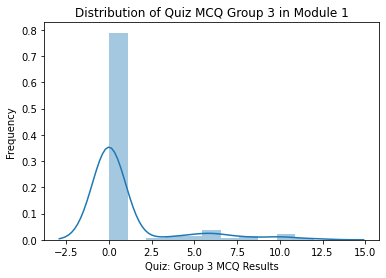

In [24]:
# Visualize the distribution of 'Quiz: Group 4 MCQ (Real)'
sns.distplot(m1mg['Quiz: Group 3 MCQ (Real)'])
plt.title('Distribution of Quiz MCQ Group 3 in Module 1')
plt.xlabel('Quiz: Group 3 MCQ Results')
plt.ylabel('Frequency ')

Text(0, 0.5, 'Frequency ')

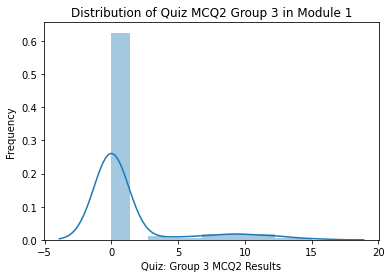

In [25]:
# Visualize the distribution of 'Quiz: Group 4 MCQ (Real)'
sns.distplot(m1mg['Quiz: Group 3 - MCQ2 (Real)'])
plt.title('Distribution of Quiz MCQ2 Group 3 in Module 1')
plt.xlabel('Quiz: Group 3 MCQ2 Results')
plt.ylabel('Frequency ')

Text(0, 0.5, 'Frequency ')

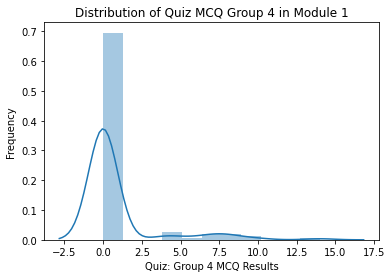

In [26]:
# Visualize the distribution of 'Quiz: Group 4 MCQ (Real)'
sns.distplot(m1mg['Quiz: Group 4 MCQ (Real)'])
plt.title('Distribution of Quiz MCQ Group 4 in Module 1')
plt.xlabel('Quiz: Group 4 MCQ Results')
plt.ylabel('Frequency ')

In [27]:
m1mg.columns

Index(['First name', 'Surname', 'ID number', 'Course total (Real)',
       'Quiz: Group 1 MCQ (Real)', 'Quiz: Group 1 - MCQ2 (Real)',
       'Quiz: Group 2 MCQ (Real)', 'Quiz: Group 2 - MCQ2 (Real)',
       'Quiz: Group 3 MCQ (Real)', 'Quiz: Group 3 - MCQ2 (Real)',
       'Quiz: Group 4 MCQ (Real)', 'Quiz: Group 5 MCQ (Real)',
       'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)',
       'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)',
       'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'disengaged'],
      dtype='object')

In [27]:
#m1mg.Quiz: Group 4 MCQ (Real)

In [29]:
spear1 = m1mg['Quiz: Group 4 MCQ (Real)']

In [28]:
spear2 = m1mg['disengaged']

In [30]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.025528413672037474, pvalue=0.78015788822978349)


In [31]:
spear3 = m1mg['Quiz: Group 3 MCQ (Real)']

In [32]:
spear33 = m1mg['Quiz: Group 3 - MCQ2 (Real)']

In [33]:
spearcorr = stats.spearmanr(spear33,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.27435883352136969, pvalue=0.0022274405706709968)


In [34]:
spearcorr = stats.spearmanr(spear3,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.23083637342093966, pvalue=0.01052550386623091)


In [31]:
m1mg.describe()

Course total (Real)  Quiz: Group 4 MCQ (Real)  \
count           122.000000                122.000000   
mean             43.060246                  0.827869   
std              19.182017                  2.475308   
min               0.000000                  0.000000   
25%              33.330000                  0.000000   
50%              43.330000                  0.000000   
75%              53.330000                  0.000000   
max              93.330000                 14.000000   

       Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.942623                     0.819672   
std                    2.613693                     2.256364   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   12.000000                    11.000000   

       Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.811475                     1.073770   
std                    2.224328                     2.960255   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   10.000000                    13.000000   

       Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.827869                     0.770492   
std                    2.478645                     2.452143   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   13.000000                    13.000000   

       Quiz: Late MCQ1 (Real)  Quiz: Late MCQ2 (Real)  disengaged  
count              122.000000              122.000000  122.000000  
mean                 0.196721                0.040984    0.795082  
std                  1.263861                0.452679    0.405306  
min                  0.000000                0.000000    0.000000  
25%                  0.000000                0.000000    1.000000  
50%                  0.000000                0.000000    1.000000  
75%                  0.000000                0.000000    1.000000  
max                 10.000000                5.000000    1.000000

In [28]:
print(m1mg['Course total (Real)'].value_counts(dropna=False))
# What are the value counts of the different marks


46.67    12
53.33    11
40.00    11
0.00     10
50.00    10
43.33    10
36.67    10
26.67     9
33.33     6
56.67     6
30.00     6
60.00     5
73.33     5
80.00     2
66.67     2
20.00     2
83.33     2
70.00     1
93.33     1
76.67     1
Name: Course total (Real), dtype: int64


In [29]:
# Describe the column
print(m1mg['Course total (Real)'].describe())


count    122.000000
mean      43.060246
std       19.182017
min        0.000000
25%       33.330000
50%       43.330000
75%       53.330000
max       93.330000
Name: Course total (Real), dtype: float64


Text(0, 0.5, 'Grade ')

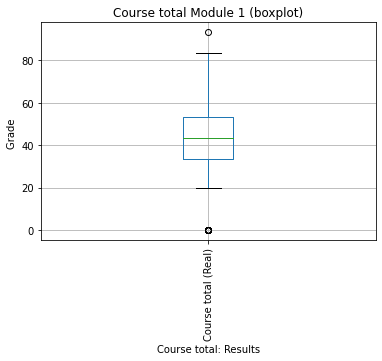

In [30]:
# Create the boxplot
m1mg.boxplot(column='Course total (Real)', rot=90)
plt.title('Course total Module 1 (boxplot)')
plt.xlabel('Course total: Results')
plt.ylabel('Grade ')


In [31]:
m1mg.head(2)

First name Surname ID number  Course total (Real)  Quiz: Group 1 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         0   
1       aSnR    bGk9  VSnRGk9O                36.67                         5   

   Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
0                            0                         0   
1                            6                         0   

   Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
0                            0                         7   
1                            0                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Late MCQ1 (Real)  disengaged  
0                       0           1  
1                       0           1

Text(0, 0.5, 'Quiz: Group 3 MCQ2 ')

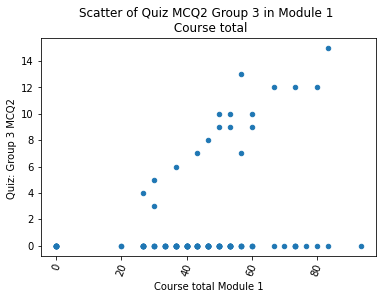

In [32]:
m1mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Group 3 - MCQ2 (Real)', rot=70)
# For scatter plot value must be numberic
# Add title and labels
plt.title('Scatter of Quiz MCQ2 Group 3 in Module 1 \n Course total')
plt.xlabel('Course total Module 1')
plt.ylabel('Quiz: Group 3 MCQ2 ')

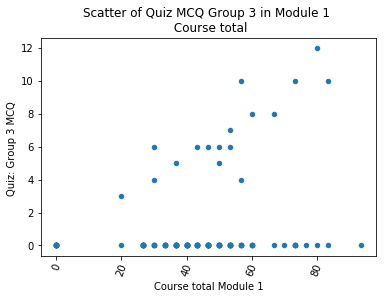

In [177]:
m1mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Group 3 MCQ (Real)', rot=70)
# For scatter plot value must be numberic
# Add title and labels
plt.title('Scatter of Quiz MCQ Group 3 in Module 1 \n Course total')
plt.xlabel('Course total Module 1')
plt.ylabel('Quiz: Group 3 MCQ ')



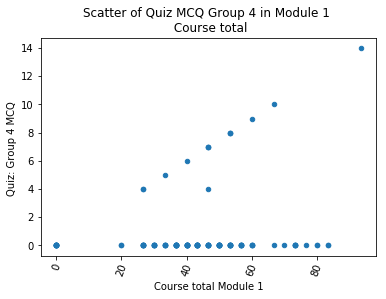

In [36]:
m1mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Group 4 MCQ (Real)', rot=70)
# For scatter plot value must be numberic
# Add title and labels
plt.title('Scatter of Quiz MCQ Group 4 in Module 1 \n Course total')
plt.xlabel('Course total Module 1')
plt.ylabel('Quiz: Group 4 MCQ ')



In [37]:
module1ml.head(2)

Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   

             Event name                                        Description  \
0  Course module viewed  The user with id '0' viewed the 'resource' act...   
1         Course viewed  The user with id '0' viewed the course with id...   

  Origin IP address  
0    web  127.0.0.1  
1    web  127.0.0.1

In [33]:
# Date
#
#
#time1
time1 = module1ml["Time"].str.split(",", n = 1, expand = True)

In [34]:
# making separate Date column from new data frame 
module1ml["Date"]= time1[0] 

# making seperate Time column from new data frame
module1ml['Time']= time1[1]

In [35]:
# Convert the date column to datetime64
module1ml.Date = pd.to_datetime(module1ml.Date)

In [36]:
module1ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
dtype: object

In [37]:
# Name split
# new data frame with split value columns 
new1 = module1ml["User full name"].str.split(" ", n = 1, expand = True)


In [38]:
# making separate first name column from new data frame 
module1ml["First name"]= new1[0] 

In [39]:
# making separate last name column from new data frame 
module1ml["Last name"]= new1[1] 

In [40]:
module1ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
First name                object
Last name                 object
dtype: object

In [41]:
#Remove activity outside semester start and end dates range -Timeedit1
mask1 = (module1ml['Date'] >= StartDate) & (module1ml['Date'] <= EndDate)

module1ml = module1ml.loc[mask1]

len(module1ml)

11451

In [42]:
mask1.head(2)

0    False
1    False
Name: Date, dtype: bool

In [43]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_1 = (module1ml['Date'] >= StartDate) & (module1ml['Date'] <= TriOne)

FirstFive1 = module1ml.loc[week5_1]

len(FirstFive1)

3831

In [44]:
# Generates descriptive statistics
week5_1.describe().transpose()

count     11451
unique        2
top       False
freq       7620
Name: Date, dtype: object

In [45]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_1 = (module1ml['Date'] >= TriOne) & (module1ml['Date'] <= TriTwo)

FirstTen1 = module1ml.loc[week10_1]

len(FirstTen1)

3982

In [46]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_1 = (module1ml['Date'] >= TriTwo) & (module1ml['Date'] <= EndDate)

FirstFivt1 = module1ml.loc[week15_1]

len(FirstFivt1)

4410

In [52]:
#drop1ml

In [48]:
module1ml = module1ml.drop(module1ml[['IP address','Origin','Description','Affected user']], axis=1)


KeyError: "None of [Index(['IP address', 'Origin', 'Description', 'Affected user'], dtype='object')] are in the [columns]"

In [49]:
module1ml.head(2)

Time User full name     Event context    Component  \
136   21:48      a7t7 bfTq  Course: Module 1  User report   
137   21:48      a7t7 bfTq  Course: Module 1       System   

                   Event name       Date First name Last name  
136  Grade user report viewed 2019-01-02       a7t7      bfTq  
137             Course viewed 2019-01-02       a7t7      bfTq

In [50]:
FirstFivt1["Event context"].value_counts()
# The files from in Lecture 1 go from Lecture 2 to Lecture 9
# All the quizess will get higher weigthing

Course: Module 1                          1422
File: Lecture 7                            266
File: Lecture 9                            239
File: Lecture 8                            226
File: Lecture 6                            179
Assignment: Group 5 - Practical Test       169
Assignment: Group 3 - Practical Test       153
Assignment: Group 1 - Practical Test       145
Assignment: Group 6 - Practical Test       137
Assignment: Group 2 - Practical Test       128
File: Lecture 5                            118
File: Lecture 4                            117
File: Lecture 3                            116
Assignment: Group 7 - Practical Test       110
File: Lecture 2                            106
Assignment: Group 4 - Practical Test       105
File: Lecture 1                             84
File: Provisional CA Marks                  65
File: Sample Paper                          65
File: Lab 9 Worksheet                       63
File: Lab 8 Worksheet                       44
File: Lab 7 W

In [54]:
module1ml["Event context"].value_counts()
# The files from in Lecture 1 go from Lecture 2 to Lecture 9
# All the quizess will get higher weigthing

Course: Module 1                          4498
File: Lecture 7                            499
File: Lecture 8                            420
File: Lecture 4                            385
File: Lecture 3                            345
File: Lecture 5                            335
File: Lecture 2                            321
File: Lecture 6                            317
File: Lecture 1                            303
File: Lecture 9                            264
File: LAB 1 Worksheet                      254
File: Lab 4 Worksheet                      237
File: Lab 7 Worksheet                      214
File: Lab 5 Worksheet                      200
File: Lab 8 Worksheet                      185
File: Provisional CA Marks                 183
Assignment: Group 5 - Practical Test       169
Assignment: Group 3 - Practical Test       153
Assignment: Group 1 - Practical Test       145
Quiz: Group 3 MCQ                          138
Assignment: Group 6 - Practical Test       137
Assignment: G

In [57]:
# module1lg
#
#

In [51]:
module1lg.info()
# Lecturer Grade info
# 95

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 95 non-null     int64  
 1   Student Id         95 non-null     object 
 2   Name               95 non-null     object 
 3   % CA               95 non-null     int64  
 4   % exam             95 non-null     int64  
 5   Average            95 non-null     float64
 6   Final(Rounded Up)  95 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ KB


In [52]:
module1lg.Average.value_counts()

35.0    6
35.5    6
40.5    4
0.0     4
50.0    3
       ..
61.5    1
74.0    1
50.5    1
22.0    1
41.5    1
Name: Average, Length: 65, dtype: int64

In [53]:
module1lg.Average.plot('hist')
# Average
plt.title('Histogram of Average grades in Module 1 \n Module 1')
plt.xlabel('Average total Module 1')
plt.ylabel('Frequency ')


TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.

In [61]:
average_mean = np.mean(module1lg)
# Compute the mean


In [62]:
print(average_mean)
# Print the results with some nice formatting


id                   61.684211
% CA                 43.726316
% exam               46.747368
Average              45.236842
Final(Rounded Up)    45.421053
dtype: float64


In [63]:
module1lg.describe().transpose()
# Moodle 1 lecture grades
# 95 Moodle grades

count       mean        std  min   25%   50%    75%    max
id                  95.0  61.684211  36.011010  2.0  29.5  64.0  92.50  122.0
% CA                95.0  43.726316  20.434348  0.0  32.5  42.0  56.00   90.0
% exam              95.0  46.747368  22.961563  0.0  35.0  44.0  62.00   90.0
Average             95.0  45.236842  20.576898  0.0  35.0  44.0  56.75   89.5
Final(Rounded Up)   95.0  45.421053  20.606020  0.0  35.0  44.0  57.00   90.0

In [54]:
# Exploring 1 column final
final1 = module1lg['Final(Rounded Up)']

In [55]:
final1.value_counts().sort_index()

0     4
3     1
7     1
8     1
10    1
17    1
22    1
24    1
26    1
27    2
29    1
30    2
31    2
32    1
35    6
36    7
37    2
40    2
41    6
42    1
43    3
44    1
45    3
46    1
47    2
48    2
50    3
51    3
52    1
53    2
54    1
55    2
56    1
57    3
58    1
60    2
61    1
62    2
64    1
65    1
67    1
68    2
71    1
74    2
76    2
81    1
82    2
84    1
88    2
90    1
Name: Final(Rounded Up), dtype: int64

Text(0, 0.5, 'Frequency ')

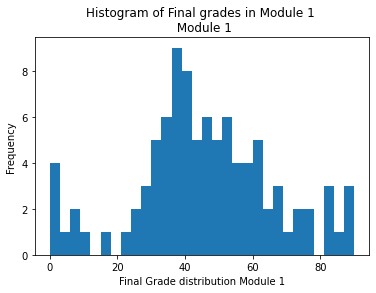

In [56]:
plt.hist(final1.dropna(),bins=30)
plt.title('Histogram of Final grades in Module 1 \n Module 1')
plt.xlabel('Final Grade distribution Module 1')
plt.ylabel('Frequency ')

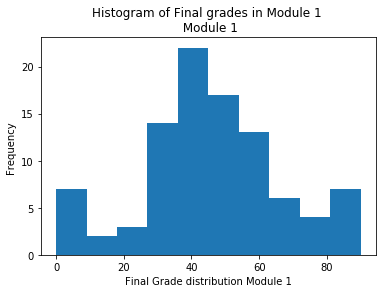

In [67]:
module1lg['Final(Rounded Up)'].plot('hist')
plt.title('Histogram of Final grades in Module 1 \n Module 1')
plt.xlabel('Final Grade distribution Module 1')
plt.ylabel('Frequency ')

In [57]:
disengaged1 = module1lg['Final(Rounded Up)'] < 55

In [58]:
disengaged1.sum()

66

In [59]:
# Filter the election DataFrame with the high_turnout array: high_turnout_df
disengaged1_df = module1lg.loc[disengaged1]

In [60]:
disengaged1_df
# the list of users who failed

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
0   105   iV38mp5J  bmp5, aV38    33      37     35.0                 35
1    38   wTka80ff  b80f, aTka    44      46     45.0                 45
2    64   ond9WT1D  bWT1, and9    42      63     52.5                 53
3    79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41
4   101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10
..  ...        ...         ...   ...     ...      ...                ...
90   39   QOmNXsdY  bXsd, aOmN    40      48     44.0                 44
91  102   XRJDFjYd  bFjY, aRJD    34      36     35.0                 35
92   90   n2njr9jS  br9j, a2nj    26      36     31.0                 31
93   57   cZWkb86b  bb86, aZWk    26      18     22.0                 22
94   68   uRzZgjR4  bgjR, aRzZ    48      56     52.0                 52

[66 rows x 7 columns]

In [65]:
m1mg

First name Surname ID number  Course total (Real)  \
0         a8NM    bDqB  U8NMDqBG                46.67   
1         aSnR    bGk9  VSnRGk9O                36.67   
2         aAK5    bSAb  tAK5SAbE                53.33   
3         a4jV    bO8M  14jVO8M7                 0.00   
4         aa14    bMdv  ba14Mdv9                46.67   
5         am5M    b1HG  um5M1HGl                36.67   
6         aL20    blLY  6L20lLYB                60.00   
7         aw97    baOy  fw97aOyU                30.00   
8         atVF    bWWA  btVFWWA9                56.67   
9         azCY    bvQB  tzCYvQBD                46.67   
10        aJGs    bxon  2JGsxonj                 0.00   
11        ajrV    bTes  qjrVTesk                53.33   
12        aNBi    b8W7  lNBi8W7k                46.67   
13        ajdR    bQnj  FjdRQnjO                 0.00   
14        aiEd    b8Pq  wiEd8PqG                80.00   
15        a2mi    bDko  z2miDkoM                56.67   
16        afDK    bEXb  qfDKEXbx                53.33   
17        aD2n    bqfd  sD2nqfdF                66.67   
18        a6Uc    b22A  t6Uc22AA                46.67   
19        a322    bSXp  z322SXpu                53.33   
20        aTcu    bg6b  LTcug6b4                46.67   
21        aYZZ    bVOq  sYZZVOqR                36.67   
22        ag2x    bJ2S  Cg2xJ2Si                56.67   
23        aS1r    buSe  KS1ruSeJ                36.67   
24        aYyZ    bMB1  RYyZMB1V                40.00   
25        aA6B    bBfk  8A6BBfkf                73.33   
26        asqg    bbCp  JsqgbCpo                53.33   
27        aHCL    bSn1  jHCLSn1y                40.00   
28        a58K    bM4Z  758KM4Z1                43.33   
29        avO9    byWN  bvO9yWNl                 0.00   
..         ...     ...       ...                  ...   
92        aejK    bpyi  CejKpyiR                33.33   
93        a9cr    b591  89cr591H                60.00   
94        aujR    bUYS  YujRUYS3                26.67   
95        aKTH    bf5R  mKTHf5RD                26.67   
96        aBbH    bDJt  ABbHDJtL                20.00   
97        ansW    buTW  UnsWuTWC                20.00   
98        ae3w    bhew  We3whewJ                46.67   
99        aFet    bYC1  aFetYC1J                 0.00   
100       apJQ    bOQ2  DpJQOQ2F                33.33   
101       aRJD    bFjY  XRJDFjYd                40.00   
102       aPWL    bLY3  8PWLLY3W                26.67   
103       aWld    bHxR  gWldHxR8                56.67   
104       aV38    bmp5  iV38mp5J                46.67   
105       acdr    bMSD  mcdrMSDD                60.00   
106       aml3    baGh  lml3aGhT                36.67   
107       an9y    b7rk  ln9y7rkB                 0.00   
108       a7t7    bfTq  g7t7fTqU                33.33   
109       a2Ru    bK65  32RuK65R                40.00   
110       aBPm    bhmN  MBPmhmNk                53.33   
111       ae1g    bAVb  7e1gAVbG                46.67   
112       aLoB    b4wd  qLoB4wdH                36.67   
113       anhO    b7J2  5nhO7J2M                43.33   
114       aAWa    b0mw  CAWa0mw8                73.33   
115       aWg7    blrD  aWg7lrD6                40.00   
116       aHxC    bglh  qHxCglhU                76.67   
117       ak8R    bBNX  9k8RBNXk                73.33   
118       a1de    bNfO  c1deNfOy                53.33   
119       afY5    bOiK  bfY5OiKA                70.00   
120       aXIv    b1jf  5XIv1jfi                43.33   
121       aiG1    bhcI  GiG1hcIK                60.00   

     Quiz: Group 1 MCQ (Real)  Quiz: Group 1 - MCQ2 (Real)  \
0                           0                            0   
1                           5                            6   
2                           0                            0   
3                           0                            0   
4                           0                            7   
5                           0                            0   
6                           0      

In [69]:
#m1mg_subset = module1mg.drop(module1mg[['Quiz: Late MCQ2','Assignment: Late Practical (Real)','Email address','Last downloaded from this course','Assignment: Group 1 - Practical Test (Real)','Assignment: Group 2 - Practical Test (Real)','Assignment: Group 3 - Practical Test (Real)','Assignment: Group 4 - Practical Test (Real)','Assignment: Group 5 - Practical Test (Real)','Assignment: Group 6 - Practical Test (Real)','Assignment: Group 7 - Practical Test (Real)']], axis=1)

In [61]:
m1mg_subset = m1mg

In [62]:
m1mg_subset.head(2)

First name Surname ID number  Course total (Real)  Quiz: Group 1 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         0   
1       aSnR    bGk9  VSnRGk9O                36.67                         5   

   Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
0                            0                         0   
1                            6                         0   

   Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
0                            0                         7   
1                            0                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Late MCQ1 (Real)  disengaged  
0                       0           1  
1                       0           1

In [63]:
m1mg_subset.dtypes

First name                      object
Surname                         object
ID number                       object
Course total (Real)            float64
Quiz: Group 1 MCQ (Real)         int64
Quiz: Group 1 - MCQ2 (Real)      int64
Quiz: Group 2 MCQ (Real)         int64
Quiz: Group 2 - MCQ2 (Real)      int64
Quiz: Group 3 MCQ (Real)         int64
Quiz: Group 3 - MCQ2 (Real)      int64
Quiz: Group 4 MCQ (Real)         int64
Quiz: Group 5 MCQ (Real)         int64
Quiz: Group 5 - MCQ2 (Real)      int64
Quiz: Group 6 MCQ (Real)         int64
Quiz: Group 6 - MCQ2 (Real)      int64
Quiz: Group 7 MCQ (Real)         int64
Quiz: Group 7 - MCQ2 (Real)      int64
Quiz: Late MCQ1 (Real)           int64
disengaged                       int64
dtype: object

In [64]:
m1mg_subset.head(2)

First name Surname ID number  Course total (Real)  Quiz: Group 1 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         0   
1       aSnR    bGk9  VSnRGk9O                36.67                         5   

   Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
0                            0                         0   
1                            6                         0   

   Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
0                            0                         7   
1                            0                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Late MCQ1 (Real)  disengaged  
0                       0           1  
1                       0           1

In [65]:
Xm1mg = m1mg_subset.iloc[:,4:18]  #independent columns
ym1mg = m1mg_subset.iloc[:,-1]    #target column i.e engaged

In [66]:
Xm1mg.head(2)

Quiz: Group 1 MCQ (Real)  Quiz: Group 1 - MCQ2 (Real)  \
0                         0                            0   
1                         5                            6   

   Quiz: Group 2 MCQ (Real)  Quiz: Group 2 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 3 MCQ (Real)  Quiz: Group 3 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 4 MCQ (Real)  Quiz: Group 5 MCQ (Real)  \
0                         7                         0   
1                         0                         0   

   Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 6 - MCQ2 (Real)  Quiz: Group 7 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 7 - MCQ2 (Real)  Quiz: Late MCQ1 (Real)  
0                            0                       0  
1                            0                       0

In [67]:
ym1mg.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [68]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xm1mg,ym1mg)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm1mg.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

                          Specs       Score
5   Quiz: Group 3 - MCQ2 (Real)  123.895819
4      Quiz: Group 3 MCQ (Real)   77.329883
12  Quiz: Group 7 - MCQ2 (Real)   16.171968
9      Quiz: Group 6 MCQ (Real)   15.307254
10  Quiz: Group 6 - MCQ2 (Real)   10.761945
6      Quiz: Group 4 MCQ (Real)    9.198738
11     Quiz: Group 7 MCQ (Real)    7.764177
13       Quiz: Late MCQ1 (Real)    6.185567
8   Quiz: Group 5 - MCQ2 (Real)    5.548866
0      Quiz: Group 1 MCQ (Real)    0.862131


[0.01857527 0.07089622 0.07354378 0.01134535 0.16000736 0.13598747
 0.12538495 0.02219758 0.09526744 0.11456301 0.04432393 0.03613671
 0.08281782 0.00895309]


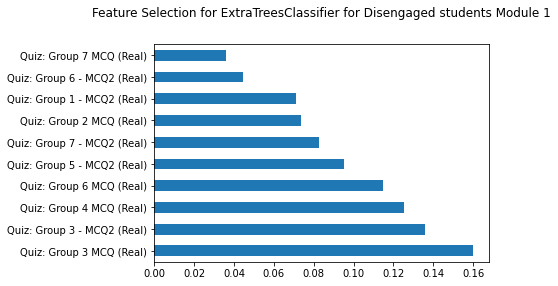

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm1mg,ym1mg)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm1mg.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Selection for ExtraTreesClassifier for Disengaged students Module 1', y=1.1)
plt.show()

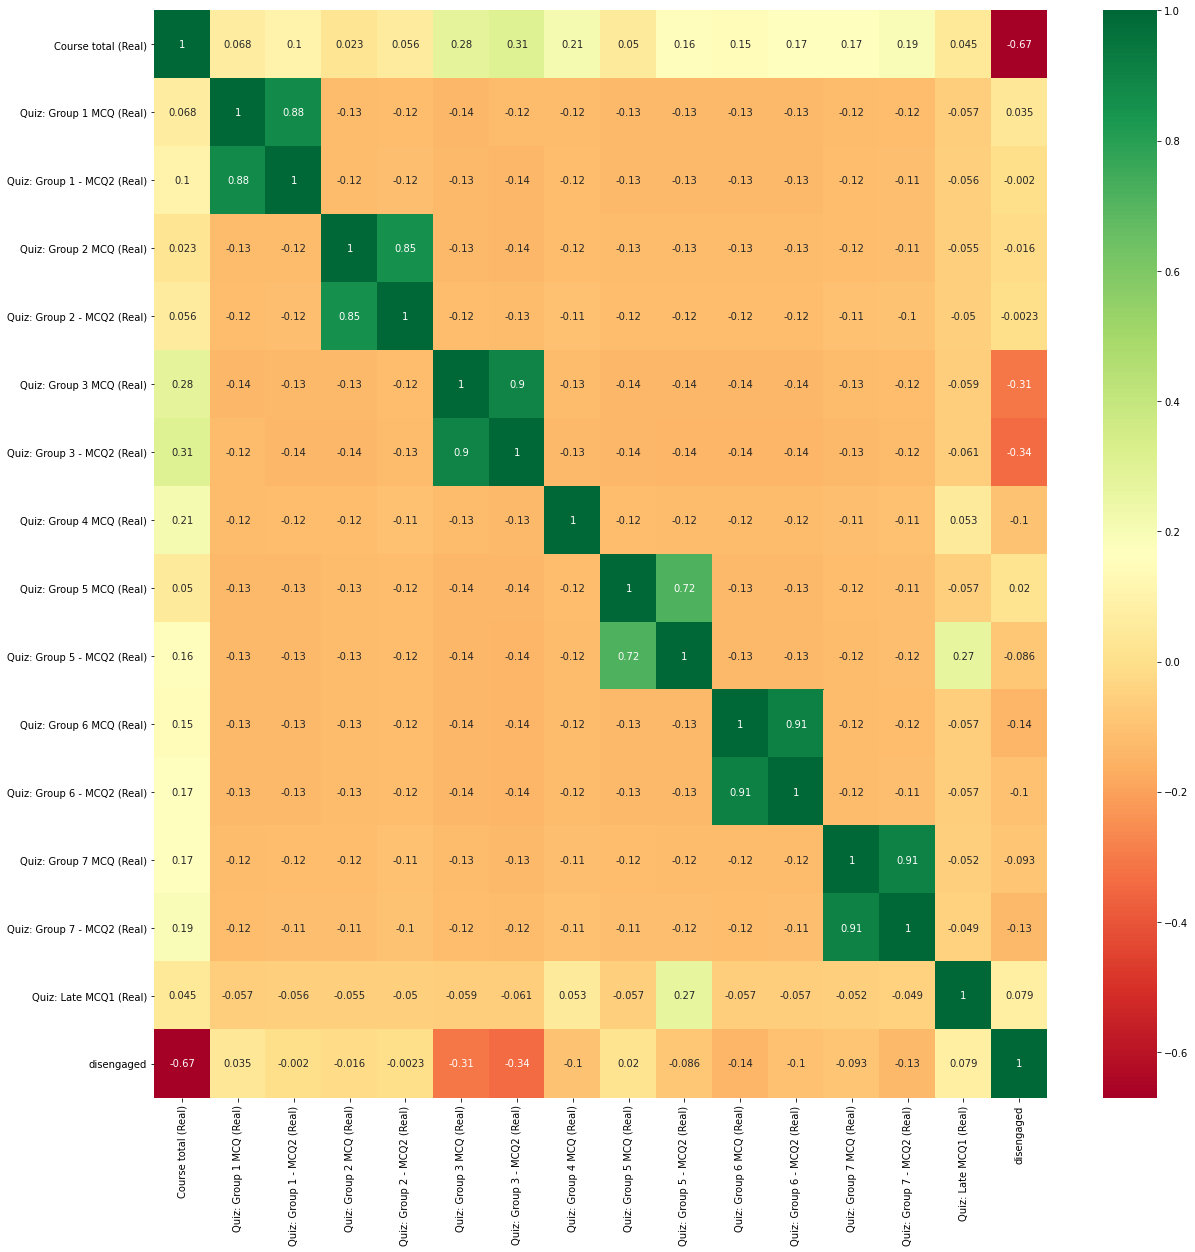

In [70]:
#get correlations of each features in dataset
corrmat = m1mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m1mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [82]:
# Print the number of unique values in each modul1lg column
print(module1mg.nunique())
# Remove the columns with 
# Important to remove unesscary values

First name                                     122
Surname                                        122
ID number                                      122
Email address                                  122
Course total (Real)                             20
Last downloaded from this course                 2
Assignment: Group 1 - Practical Test (Real)      1
Assignment: Group 2 - Practical Test (Real)      1
Assignment: Group 3 - Practical Test (Real)      1
Assignment: Group 4 - Practical Test (Real)      1
Assignment: Group 5 - Practical Test (Real)      1
Assignment: Group 6 - Practical Test (Real)      1
Assignment: Group 7 - Practical Test (Real)      1
Assignment: Late Practical (Real)                1
Quiz: Group 1 MCQ (Real)                         8
Quiz: Group 1 - MCQ2 (Real)                      8
Quiz: Group 2 MCQ (Real)                         8
Quiz: Group 2 - MCQ2 (Real)                      8
Quiz: Group 3 MCQ (Real)                         9
Quiz: Group 3 - MCQ2 (Real)    

In [83]:
print(m1mg.nunique())

First name                     122
Surname                        122
ID number                      122
Course total (Real)             20
Quiz: Group 1 MCQ (Real)         8
Quiz: Group 1 - MCQ2 (Real)      8
Quiz: Group 2 MCQ (Real)         8
Quiz: Group 2 - MCQ2 (Real)      8
Quiz: Group 3 MCQ (Real)         9
Quiz: Group 3 - MCQ2 (Real)     12
Quiz: Group 4 MCQ (Real)         9
Quiz: Group 5 MCQ (Real)         8
Quiz: Group 5 - MCQ2 (Real)      8
Quiz: Group 6 MCQ (Real)         9
Quiz: Group 6 - MCQ2 (Real)      9
Quiz: Group 7 MCQ (Real)         9
Quiz: Group 7 - MCQ2 (Real)     10
Quiz: Late MCQ1 (Real)           3
disengaged                       2
dtype: int64


In [71]:
module1ml.head(2)

Time User full name     Event context    Component  \
136   21:48      a7t7 bfTq  Course: Module 1  User report   
137   21:48      a7t7 bfTq  Course: Module 1       System   

                   Event name       Date First name Last name  
136  Grade user report viewed 2019-01-02       a7t7      bfTq  
137             Course viewed 2019-01-02       a7t7      bfTq

In [72]:
module1ml_onehot = module1ml.copy()
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Event name'], prefix = ['Event name'])
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Event context'], prefix = ['Event context'])
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Component'], prefix = ['Component'])


print(module1ml_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



       Time User full name       Date First name Last name  \
136   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
137   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
286   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
287   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
288   20:29      ansW buTW 2019-01-21       ansW      buTW   

     Event name_A file has been uploaded.  \
136                                     0   
137                                     0   
286                                     0   
287                                     0   
288                                     0   

     Event name_A submission has been submitted.  \
136                                            0   
137                                            0   
286                                            0   
287                                            0   
288                                            0   

     Event name_Badge listing viewed  \
136

In [73]:
module1ml_onehot.dtypes


Time                                 object
User full name                       object
Date                         datetime64[ns]
First name                           object
Last name                            object
                                  ...      
Component_Overview report             uint8
Component_Quiz                        uint8
Component_System                      uint8
Component_URL                         uint8
Component_User report                 uint8
Length: 88, dtype: object

In [86]:
# Merge1
#
#
#
#

In [74]:
# Onehot1 merge
merge_subset1 = pd.merge(module1ml_onehot,m1mg_subset[['First name','disengaged']],on='First name', how='left')


In [75]:
merge_subset1.head(2)

Time User full name       Date First name Last name  \
0   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  ...  Component_Assignment  Component_File  \
0                                0  ...                     0               0   
1                                0  ...                     0               0   

   Component_File submissions  Component_Forum  Component_Overview report  \
0                           0                0                          0   
1                           0                0                          0   

   Component_Quiz  Component_System  Component_URL  Component_User report  \
0               0                 0              0                      1   
1               0                 1              0                      0   

   disengaged  
0           1  
1           1  

[2 rows x 89 columns]

In [76]:
X1s = merge_subset1.iloc[:,5:88]  #independent columns
y1s = merge_subset1.iloc[:,-1]    #target column i.e engaged


In [77]:
X1s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                0                           0   
1                                0                           0   

   Event name_Course user report viewed  Event name_Course viewed  \
0                                     0                         0   
1                                     0                         1   

   Event name_Discussion created  Event name_Discussion viewed  ...  \
0                              0                             0  ...   
1                              0                             0  ...   

   Event context_URL: online Rjf guide  Component_Assignment  Component_File  \
0                                    0                     0               0   
1                                    0                     0               0   

   Component_File submissions  Component_Forum  Component_Overview report  \
0                           0                0                          0   
1                           0                0                          0   

   Component_Quiz  Component_System  Component_URL  Component_User report  
0               0                 0              0                      1  
1               0                 1              0                      0  

[2 rows x 83 columns]

In [78]:
y1s.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [79]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1s,y1s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
31  Event context_Assignment: Group 3 - Practical ...  65.788602
63                    Event context_Quiz: Group 3 MCQ  36.772765
39               Event context_File: Lab 10 Worksheet  22.103855
46                Event context_File: Lab 8 Worksheet  15.977438
54                      Event context_File: Lecture 6   8.051252
58           Event context_File: Provisional CA Marks   7.979629
6                Event name_Course user report viewed   7.091281
75                                     Component_File   7.091171
29  Event context_Assignment: Group 1 - Practical ...   6.446768
67                      Event context_Quiz: Late MCQ1   6.380721


[9.10594717e-04 1.76766288e-03 2.94500256e-04 8.73913750e-04
 1.29319636e-02 1.10166722e-03 2.43786914e-02 7.53778600e-03
 5.80838674e-04 1.75149814e-03 2.67244954e-04 1.71658482e-03
 5.61039345e-04 2.64079418e-03 8.87659879e-04 1.21648931e-03
 3.39873375e-03 4.08475169e-03 4.57832354e-04 1.17804274e-03
 9.28884950e-04 1.01487245e-02 1.75462717e-03 7.30060594e-03
 1.95138448e-03 3.38047045e-04 1.95164821e-04 4.74165046e-04
 2.13746757e-03 2.21253097e-02 9.53533451e-03 2.16756679e-01
 1.19594325e-02 1.33508761e-02 9.66210153e-03 1.59102577e-02
 4.96254522e-03 4.90963579e-04 1.29501796e-03 8.72555999e-02
 6.81777883e-03 1.03173664e-03 8.37270799e-04 1.38711070e-03
 1.97054574e-02 1.82345620e-02 7.03252708e-02 6.34268847e-04
 1.56830423e-03 1.67564658e-02 1.10537240e-02 1.38051041e-03
 5.42403754e-03 9.93980343e-03 1.61377284e-02 1.33699159e-03
 5.07480003e-03 1.19395536e-03 3.55519228e-02 5.66811121e-03
 2.16627022e-03 9.01381647e-04 1.77958072e-02 1.18858048e-01
 4.01311369e-03 1.374035

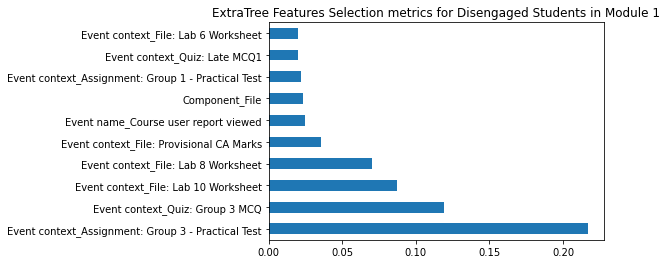

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X1s,y1s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 1')
plt.show()


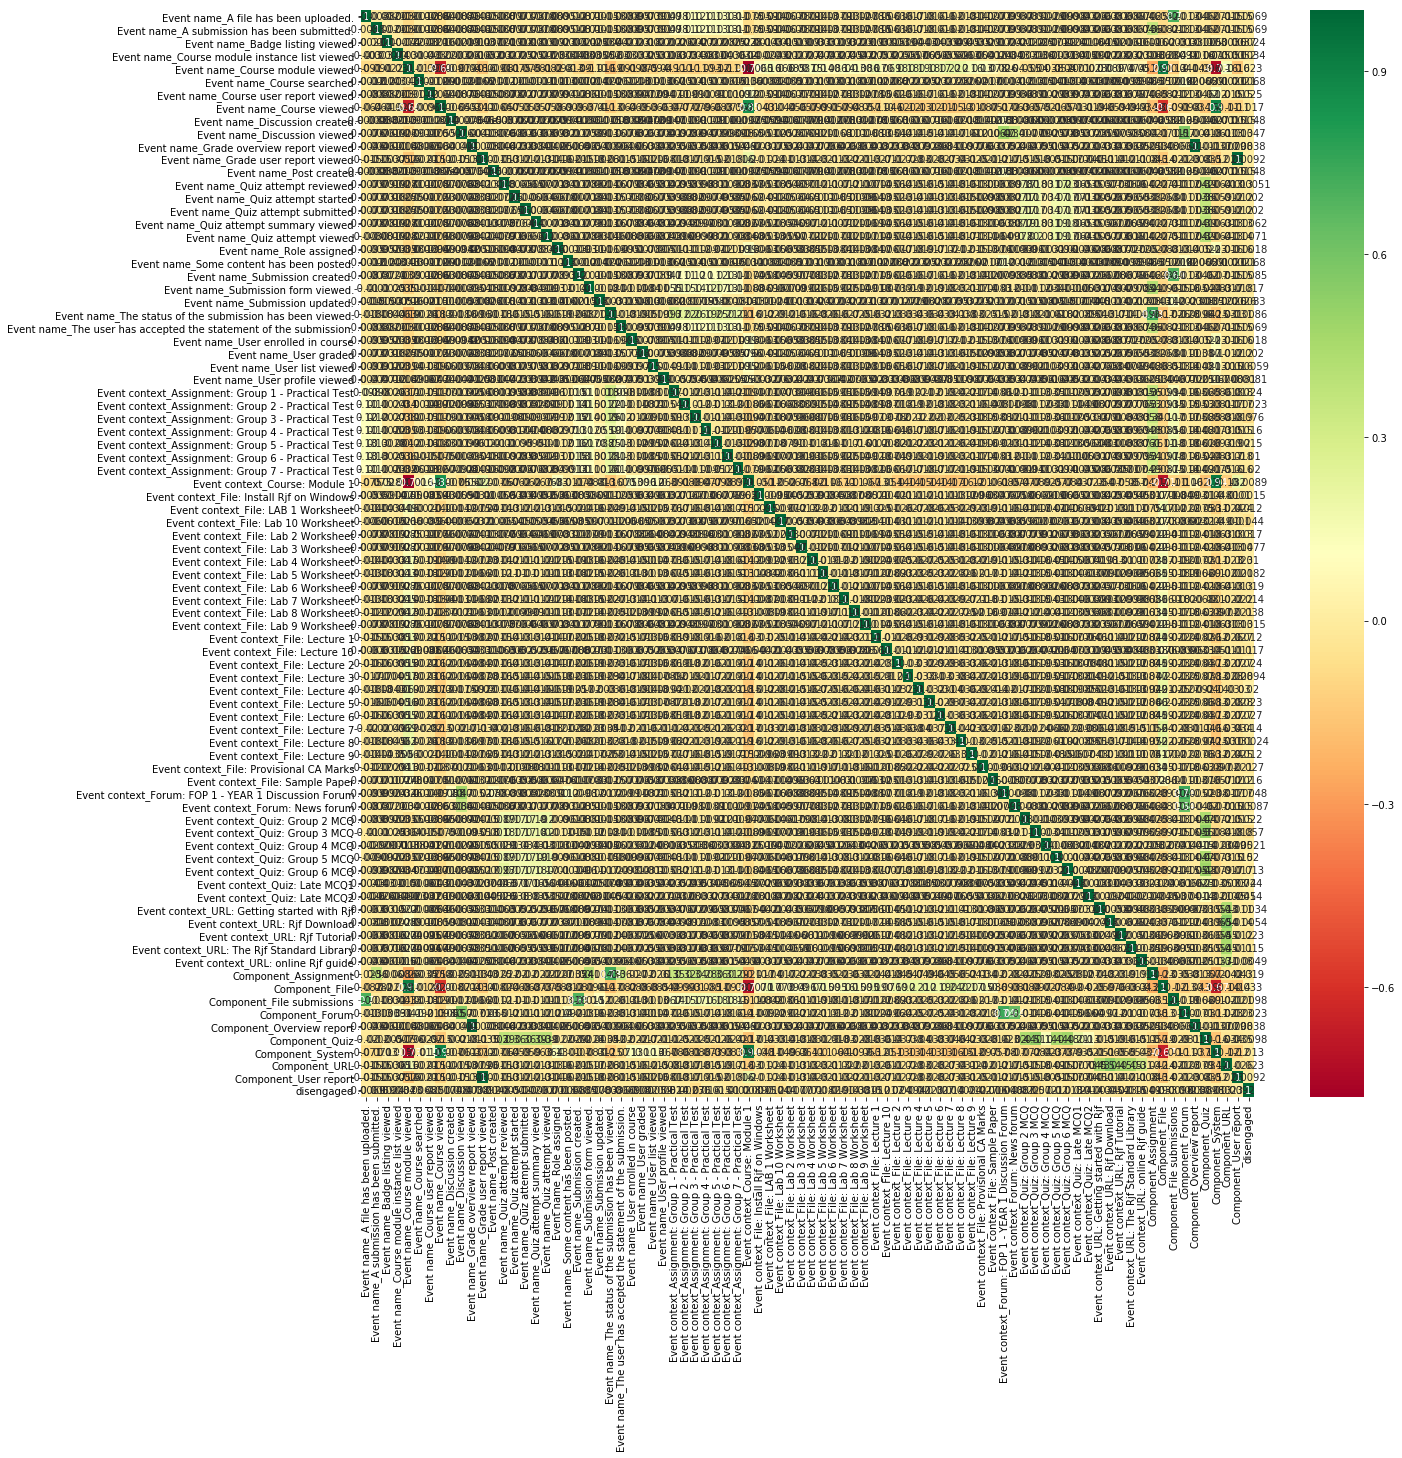

In [94]:
#get correlations of each features in dataset
corrmat = merge_subset1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset1[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [81]:
featselect1 = X1s[['Event context_Assignment: Group 3 - Practical Test','Event context_Quiz: Group 3 MCQ','Event context_File: Lab 10 Worksheet','Event context_File: Lab 8 Worksheet','Event context_File: Provisional CA Marks','Event context_Assignment: Group 1 - Practical Test','Event name_Course user report viewed','Component_File','Event context_File: Lecture 6','Event context_File: Lab 6 Worksheet']]


In [82]:
featselect1.head(2)

Event context_Assignment: Group 3 - Practical Test  \
0                                                  0    
1                                                  0    

   Event context_Quiz: Group 3 MCQ  Event context_File: Lab 10 Worksheet  \
0                                0                                     0   
1                                0                                     0   

   Event context_File: Lab 8 Worksheet  \
0                                    0   
1                                    0   

   Event context_File: Provisional CA Marks  \
0                                         0   
1                                         0   

   Event context_Assignment: Group 1 - Practical Test  \
0                                                  0    
1                                                  0    

   Event name_Course user report viewed  Component_File  \
0                                     0               0   
1                                     0               0   

   Event context_File: Lecture 6  Event context_File: Lab 6 Worksheet  
0                              0                                    0  
1                              0                                    0

In [83]:
Xfs = featselect1 # Features
yfs = y1s # Target variable

In [84]:
yfs.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [85]:
# Split dataset into training set and test set
Xfs_train, Xfs_test, yfs_train, yfs_test = train_test_split(Xfs, yfs, test_size=0.3, random_state=1) # 70% training and 30% test

In [149]:
# Create Decision Tree classifer object
dtclffs = DecisionTreeClassifier(criterion ='gini',max_features = 3,max_depth =3)

# Train Decision Tree Classifer
dtclffs = dtclffs.fit(Xfs_train,yfs_train)

#Predict the response for test dataset
yfs_pred = dtclffs.predict(Xfs_test)

In [150]:
# Compute accuracy
print(dtclffs.score(Xfs_test, yfs_test))

0.7922002328288708


In [151]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(dtclffs, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10))

0.7880226088959873


In [87]:
print("Accuracy:",metrics.accuracy_score(yfs_test, yfs_pred))
print("Precision:",metrics.precision_score(yfs_test, yfs_pred))
print("Recall:",metrics.recall_score(yfs_test, yfs_pred))
print("F1 Score",metrics.f1_score(yfs_test, yfs_pred))

Accuracy: 0.7922002328288708
Precision: 0.7922002328288708
Recall: 1.0
F1 Score 0.8840532640467684


In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs_test, yfs_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs_test, yfs_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs_test, yfs_pred)))

Mean Absolute Error: 0.20779976717112922
Mean Squared Error: 0.20779976717112922
Root Mean Squared Error: 0.4558505974232448


In [89]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs1 = LogisticRegression()

# fit the model with data
logregfs1.fit(Xfs_train,yfs_train)

#
ylg1_pred=logregfs1.predict(Xfs_test)


In [152]:
# Compute accuracy
print(logregfs1.score(Xfs_test, yfs_test))

0.7922002328288708


In [90]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregfs1, Xfs_train, yfs_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregfs1, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10))

0.7890206109682545
0.789020582127702


In [91]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs_test, ylg1_pred))
print(classification_report(yfs_test, ylg1_pred))


[[   0  714]
 [   0 2722]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       714
           1       0.79      1.00      0.88      2722

    accuracy                           0.79      3436
   macro avg       0.40      0.50      0.44      3436
weighted avg       0.63      0.79      0.70      3436



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# import the metrics class
from sklearn import metrics
cnflr1_matrix = metrics.confusion_matrix(yfs_test, ylg1_pred)
cnflr1_matrix


array([[   0,  714],
       [   0, 2722]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

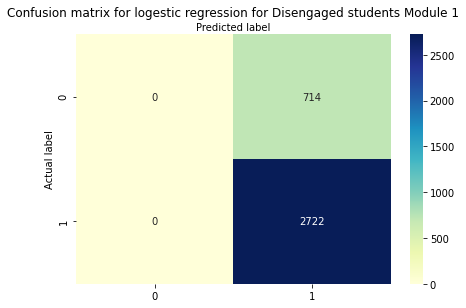

In [93]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr1_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for logestic regression for Disengaged students Module 1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


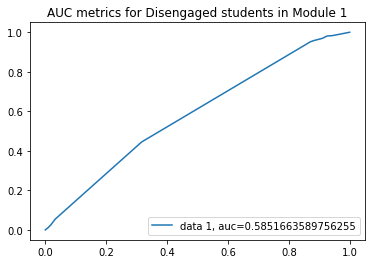

In [94]:
ylg1_pred_proba = logregfs1.predict_proba(Xfs_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs_test,  ylg1_pred_proba)
auc = metrics.roc_auc_score(yfs_test, ylg1_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.58. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


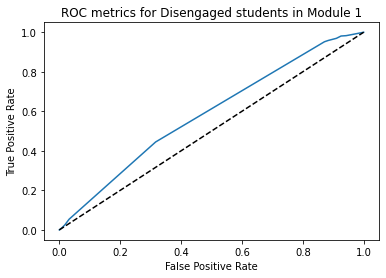

In [95]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs_test, ylg1_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [96]:

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logregfs1, Xfs_train, yfs_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC scores computed using 5-fold cross-validation: [0.55394555 0.56553313 0.53579882 0.56176649 0.54171101]


In [97]:
# Instantiate the classifier
rfclffs1 = RandomForestClassifier(n_estimators =20)

# Fit to the training data
rfclffs1.fit(Xfs_train, yfs_train)

# Compute accuracy
print(rfclffs1.score(Xfs_test, yfs_test))


0.7922002328288708


In [98]:
cvscores_10rf = cross_val_score(rfclffs1, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7878977649509186


In [100]:
from sklearn.svm import SVC

svcfs1 = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs1.fit(Xfs_train, yfs_train)

# Compute accuracy
print(svcfs1.score(Xfs_test, yfs_test))


0.7922002328288708


In [101]:
cvscores_10svc = cross_val_score(svcfs1, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10svc))

0.789020582127702


In [102]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs_test, ylg1_pred))
print(classification_report(yfs_test, ylg1_pred))


[[   0  714]
 [   0 2722]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       714
           1       0.79      1.00      0.88      2722

    accuracy                           0.79      3436
   macro avg       0.40      0.50      0.44      3436
weighted avg       0.63      0.79      0.70      3436



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xfs_train, yfs_train)

# Predict
bagged_pred = bagged_model.predict(Xfs_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yfs_test, bagged_pred))


0.7922002328288708


In [155]:
cvscores_10 = cross_val_score(bagged_model, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10))

0.7875232331157126


In [104]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xfs_train, yfs_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xfs_test)

# Print model accuracy
print(accuracy_score(yfs_test, boosted_pred))


0.7922002328288708


In [154]:
cvscores_10 = cross_val_score(boosted_model, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10))

0.7876480770607813


In [105]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xfs_train, yfs_train)

# Predict
xgb_pred = xgb.predict(Xfs_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yfs_test, xgb_pred))


Final prediction score: [0.79220023]


In [156]:
cvscores_10 = cross_val_score(xgb, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10))

0.7876480770607813


In [140]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs_test, xgb_pred))
print(classification_report(yfs_test, xgb_pred))


[[   0  714]
 [   0 2722]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       714
           1       0.79      1.00      0.88      2722

    accuracy                           0.79      3436
   macro avg       0.40      0.50      0.44      3436
weighted avg       0.63      0.79      0.70      3436



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
#Trimester1

In [106]:
FirstFive1.head(2)

Time User full name Affected user               Event context  \
3704   23:55      ap1Y bpWX             -  File: Provisional CA Marks   
3705   23:55      ap1Y bpWX             -  File: Provisional CA Marks   

     Component            Event name  \
3704      File  Course module viewed   
3705      File  Course module viewed   

                                            Description Origin IP address  \
3704  The user with id '0' viewed the 'resource' act...    web  127.0.0.1   
3705  The user with id '0' viewed the 'resource' act...    web  127.0.0.1   

           Date First name Last name  
3704 2018-10-12       ap1Y      bpWX  
3705 2018-10-12       ap1Y      bpWX

In [107]:
FirstFive1 = FirstFive1.drop(FirstFive1[['IP address','Origin','Description','Affected user']], axis=1)


In [108]:
FirstFive1.head(2)

Time User full name               Event context Component  \
3704   23:55      ap1Y bpWX  File: Provisional CA Marks      File   
3705   23:55      ap1Y bpWX  File: Provisional CA Marks      File   

                Event name       Date First name Last name  
3704  Course module viewed 2018-10-12       ap1Y      bpWX  
3705  Course module viewed 2018-10-12       ap1Y      bpWX

In [109]:
FirstFive1_onehot = FirstFive1.copy()
FirstFive1_onehot = pd.get_dummies(FirstFive1_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive1_onehot = pd.get_dummies(FirstFive1_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive1_onehot = pd.get_dummies(FirstFive1_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive1_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



        Time User full name       Date First name Last name  \
3704   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   
3705   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   
3706   23:52      af9A bQxP 2018-10-12       af9A      bQxP   
3707   23:39      aLoB b4wd 2018-10-12       aLoB      b4wd   
3708   23:39      aLoB b4wd 2018-10-12       aLoB      b4wd   

      Event name_Badge listing viewed  \
3704                                0   
3705                                0   
3706                                0   
3707                                0   
3708                                0   

      Event name_Course module instance list viewed  \
3704                                              0   
3705                                              0   
3706                                              0   
3707                                              0   
3708                                              0   

      Event name_Course module viewed  Even

In [110]:
merge_subset1_tri = pd.merge(FirstFive1_onehot,m1mg_subset[['First name','disengaged']],on='First name', how='left')


In [111]:
merge_subset1_tri.head(2)

Time User full name       Date First name Last name  \
0   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   
1   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                1                           0   
1                                1                           0   

   Event name_Course user report viewed  ...  Event context_URL: Rjf Tutorial  \
0                                     0  ...                                0   
1                                     0  ...                                0   

   Event context_URL: The Rjf Standard Library  Component_File  \
0                                            0               1   
1                                            0               1   

   Component_Forum  Component_Overview report  Component_Quiz  \
0                0                          0               0   
1                0                          0               0   

   Component_System  Component_URL  Component_User report  disengaged  
0                 0              0                      0           1  
1                 0              0                      0           1  

[2 rows x 64 columns]

In [112]:
X51s = merge_subset1_tri.iloc[:,5:63]  #independent columns
y51s = merge_subset1_tri.iloc[:,-1]    #target column i.e engaged


In [113]:
X51s.head(2)

Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                1                           0   
1                                1                           0   

   Event name_Course user report viewed  Event name_Course viewed  \
0                                     0                         0   
1                                     0                         0   

   Event name_Discussion viewed  Event name_Grade overview report viewed  \
0                             0                                        0   
1                             0                                        0   

   Event name_Grade user report viewed  Event name_Quiz attempt reviewed  ...  \
0                                    0                                 0  ...   
1                                    0                                 0  ...   

   Event context_URL: Rjf Download  Event context_URL: Rjf Tutorial  \
0                                0                                0   
1                                0                                0   

   Event context_URL: The Rjf Standard Library  Component_File  \
0                                            0               1   
1                                            0               1   

   Component_Forum  Component_Overview report  Component_Quiz  \
0                0                          0               0   
1                0                          0               0   

   Component_System  Component_URL  Component_User report  
0                 0              0                      0  
1                 0              0                      0  

[2 rows x 58 columns]

In [114]:
y51s.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [115]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X51s,y51s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X51s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                          Specs      Score
45              Event context_Quiz: Group 3 MCQ  25.818514
44              Event context_Quiz: Group 2 MCQ   8.212498
41     Event context_File: Provisional CA Marks   7.777992
56                                Component_URL   7.480575
49              Event context_URL: Rjf Tutorial   5.473475
23          Event context_File: Lab 2 Worksheet   4.138820
51                               Component_File   3.921489
54                               Component_Quiz   3.854703
50  Event context_URL: The Rjf Standard Library   3.791485
21          Event context_File: LAB 1 Worksheet   3.179918


[0.00034416 0.00168092 0.01668934 0.00552335 0.02918122 0.00567464
 0.00988835 0.00140033 0.00044915 0.00587803 0.00126329 0.00152419
 0.00986203 0.01214376 0.0018818  0.00214047 0.00421391 0.00035048
 0.00138383 0.0077172  0.00190204 0.0140381  0.03880136 0.03463384
 0.00279827 0.0127213  0.00127868 0.00789582 0.0051754  0.00783417
 0.01071656 0.00451357 0.00091161 0.00302233 0.01712431 0.00364481
 0.00118784 0.02045034 0.01628727 0.01702404 0.01694276 0.10133257
 0.00449029 0.00419678 0.10009911 0.21885341 0.02024504 0.00253077
 0.00659269 0.03149305 0.02290209 0.03317579 0.00461563 0.00169216
 0.03274754 0.01273503 0.04338148 0.00082173]


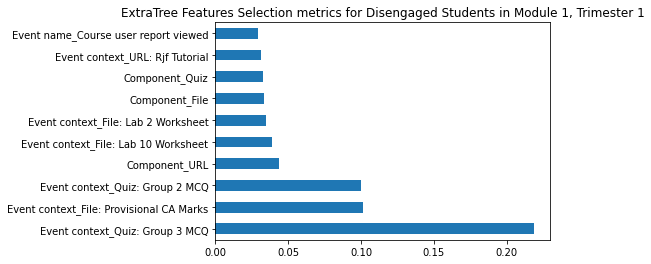

In [116]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X51s,y51s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 1, Trimester 1')
feat_importances = pd.Series(model.feature_importances_, index=X51s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


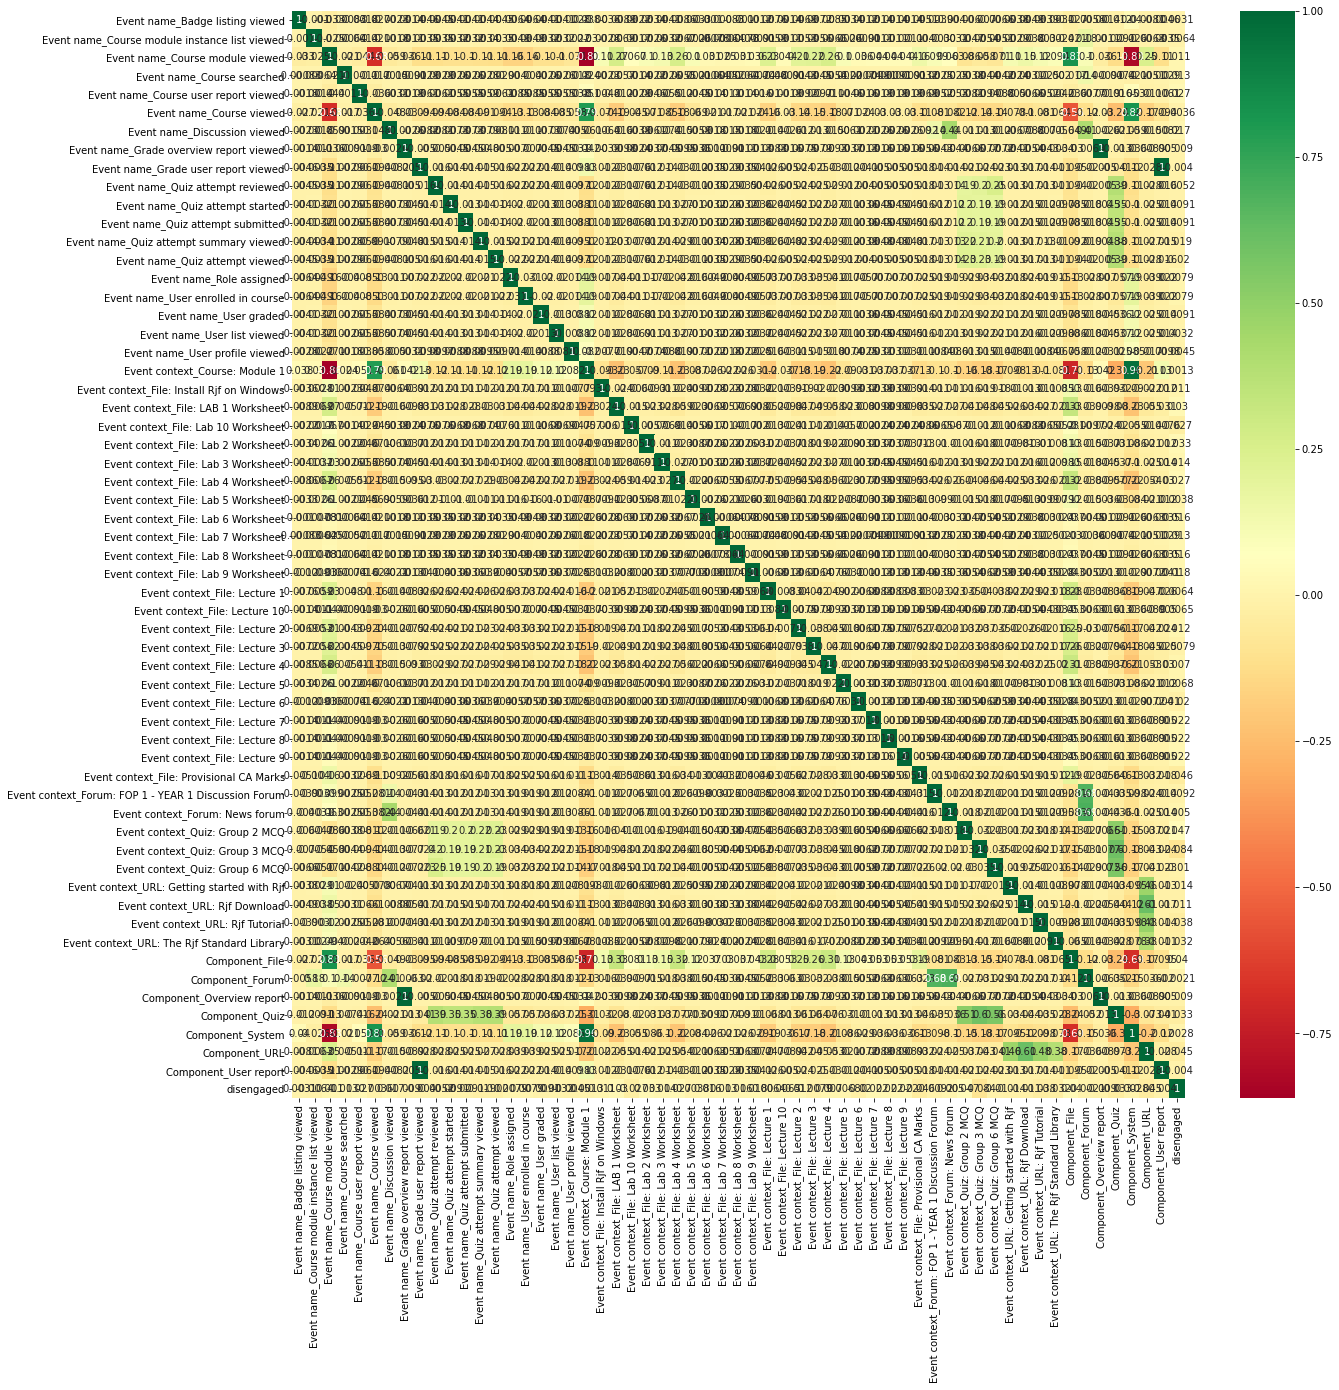

In [117]:
#get correlations of each features in dataset
corrmat = merge_subset1_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset1_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [118]:
X51s.columns

Index(['Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed',
       'Event name_Quiz attempt reviewed', 'Event name_Quiz attempt started',
       'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_User enrolled in course', 'Event name_User graded',
       'Event name_User list viewed', 'Event name_User profile viewed',
       'Event context_Course: Module 1',
       'Event context_File: Install Rjf on Windows',
       'Event context_File: LAB 1 Worksheet',
       'Event context_File: Lab 10 Worksheet',
       'Event context_File: Lab 2 Worksheet',
    

In [130]:
# Kbest Trimester1                                          Specs      Score
#45              Event context_Quiz: Group 3 MCQ  25.818514
#44              Event context_Quiz: Group 2 MCQ   8.212498
#41     Event context_File: Provisional CA Marks   7.777992
#56                                Component_URL   7.480575
#49              Event context_URL: Rjf Tutorial   5.473475
#23          Event context_File: Lab 2 Worksheet   4.138820
#51                               Component_File   3.921489
#54                               Component_Quiz   3.854703
#50  Event context_URL: The Rjf Standard Library   3.791485
#21          Event context_File: LAB 1 Worksheet   3.179918

In [119]:
feattime51 = X51s[['Event context_Quiz: Group 3 MCQ','Event context_Quiz: Group 2 MCQ','Event context_File: Provisional CA Marks','Component_URL','Event context_URL: Rjf Tutorial','Event context_File: Lab 2 Worksheet','Component_File','Component_Quiz','Event context_URL: The Rjf Standard Library','Event context_File: LAB 1 Worksheet']]

In [120]:
Xt1a = feattime51 # Features
yt1a = y51s # Target variable

In [121]:
# Create training and testing sets
Xt1a_train, Xt1a_test, yt1a_train, yt1a_test = train_test_split(Xt1a, yt1a, test_size=0.3)


In [122]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt1a = LogisticRegression()

# fit the model with data
logregt1a.fit(Xt1a_train,yt1a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
yt1a_pred=logregt1a.predict(Xt1a_test)

In [144]:
# Compute accuracy
print(logregt1a.score(Xt1a_test, yt1a_test))

0.7721739130434783


In [126]:
# Perform 10-fold CV
cvscores_1a = cross_val_score(logregt1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_1a))

0.7597916551073628


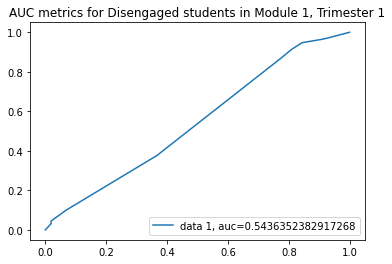

In [124]:
ylg1a_pred_proba = logregt1a.predict_proba(Xt1a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt1a_test,  ylg1a_pred_proba)
auc = metrics.roc_auc_score(yt1a_test, ylg1a_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 1, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.54. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


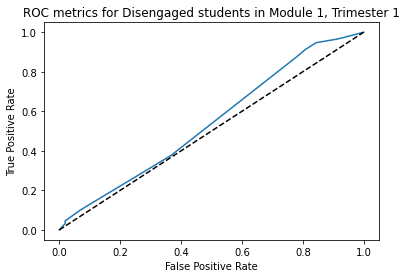

In [125]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt1a_test, ylg1a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 1, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [127]:
print("Accuracy:",metrics.accuracy_score(yt1a_test, yt1a_pred))
print("Precision:",metrics.precision_score(yt1a_test, yt1a_pred))
print("Recall:",metrics.recall_score(yt1a_test, yt1a_pred))
print("F1 Score",metrics.f1_score(yt1a_test, yt1a_pred))


Accuracy: 0.7721739130434783
Precision: 0.7721739130434783
Recall: 1.0
F1 Score 0.87144259077527


In [146]:
# Instantiate the classifier
rfclffs1a = RandomForestClassifier(n_estimators = 20,criterion = "gini",max_depth = 3,bootstrap ='True')

# Fit to the training data
rfclffs1a.fit(Xt1a_train, yt1a_train)

# Compute accuracy
print(rfclffs1a.score(Xt1a_test, yt1a_test))


0.7721739130434783


In [130]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7597916551073628


In [147]:
from sklearn.svm import SVC

svcfs1a = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs1a.fit(Xt1a_train, yt1a_train)

# Compute accuracy
print(svcfs1a.score(Xt1a_test, yt1a_test))


0.7721739130434783


In [132]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.7597916551073628


In [157]:
# Create Decision Tree classifer object
dtclffs1a = DecisionTreeClassifier(criterion ='gini',max_features = 3,max_depth =3)

# Train Decision Tree Classifer
dtclffs1a = dtclffs1a.fit(Xt1a_train,yt1a_train)

#Predict the response for test dataset
yfs1a_pred = dtclffs1a.predict(Xt1a_test)


In [159]:
# Compute accuracy
print(dtclffs1a.score(Xt1a_test, yt1a_test))


0.7721739130434783


In [158]:
# Perform 10-fold CV
cvscores_10dt1a = cross_val_score(dtclffs1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10dt1a))

0.7597916551073628


In [135]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt1a_test, yt1a_pred))
print(classification_report(yt1a_test, yt1a_pred))


[[  0 262]
 [  0 888]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.77      1.00      0.87       888

    accuracy                           0.77      1150
   macro avg       0.39      0.50      0.44      1150
weighted avg       0.60      0.77      0.67      1150



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#````````````````````````

In [160]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xt1a_train, yt1a_train)

# Predict
bagged_pred = bagged_model.predict(Xt1a_test)

# Print accuracy score
#print(accuracy_score(yt1a_test, bagged_pred))
# Print accuracy score
print(bagged_model.score(Xt1a_train, yt1a_train))


0.7597911227154047


In [161]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(bagged_model, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10))

0.7597916551073628


In [162]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xt1a_train, yt1a_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xt1a_test)

# Print model accuracy
print(accuracy_score(yt1a_test, boosted_pred))


0.7721739130434783


In [163]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(boosted_model, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10))

0.7597916551073628


In [138]:
import xgboost as xgb

In [164]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xt1a_train, yt1a_train)

# Predict
xgb_pred = xgb.predict(Xt1a_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yt1a_test, xgb_pred))


Final prediction score: [0.77217391]


In [165]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(xgb, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10))

0.7597916551073628


In [143]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt1a_test, xgb_pred))
print(classification_report(yt1a_test, xgb_pred))


[[  0 262]
 [  0 888]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.77      1.00      0.87       888

    accuracy                           0.77      1150
   macro avg       0.39      0.50      0.44      1150
weighted avg       0.60      0.77      0.67      1150



In [ ]:
`#````````````````````````

In [163]:
disengaged1.sum()

66

In [182]:
print(merge_subset1['Event context_Quiz: Group 3 MCQ'].value_counts(dropna=False))
# What are the value counts of the different marks

0    11313
1      138
Name: Event context_Quiz: Group 3 MCQ, dtype: int64


In [183]:
# Filter the election DataFrame with the high_turnout array: high_turnout_df
disengaged1_df = module1lg.loc[disengaged1]

In [184]:
average_mean = np.mean(disengaged1_df)
# Compute the mean


In [185]:
print(average_mean)

id                   61.984848
% CA                 34.121212
% exam               35.757576
Average              34.939394
Final(Rounded Up)    35.106061
dtype: float64


In [186]:
average_mean = np.mean(merge_subset1)
# Compute the mean


In [187]:
print(average_mean)
# Print the results with some nice formatting


Event name_A file has been uploaded.                                 0.008733
Event name_A submission has been submitted.                          0.008733
Event name_Badge listing viewed                                      0.000524
Event name_Course module instance list viewed                        0.001048
Event name_Course module viewed                                      0.484674
Event name_Course searched                                           0.000175
Event name_Course user report viewed                                 0.008646
Event name_Course viewed                                             0.316916
Event name_Discussion created                                        0.000087
Event name_Discussion viewed                                         0.006550
Event name_Grade overview report viewed                              0.002445
Event name_Grade user report viewed                                  0.025238
Event name_Post created                                         

In [189]:
chi = stats.chisquare(disengaged1)
print(chi)

Power_divergenceResult(statistic=28.999999999999996, pvalue=0.99999999998931033)


In [191]:
# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between engaged is statistically significant")
else:
    print("No significant difference between disengaged found")

No significant difference between disengaged found


In [113]:
Powerfeatselect1 = merge_subset1[['Event context_Assignment: Group 3 - Practical Test','Event context_Quiz: Group 3 MCQ','Event context_File: Lab 10 Worksheet','Event context_File: Lab 8 Worksheet','Event context_File: Provisional CA Marks','Event context_Assignment: Group 1 - Practical Test','Event name_Course user report viewed','Component_File','Event context_File: Lecture 6','Event context_File: Lab 6 Worksheet','disengaged']]


In [114]:
Powerfeatselect1.groupby(['disengaged']).mean()

Event context_Assignment: Group 3 - Practical Test  \
disengaged                                                       
0                                                    0.030353    
1                                                    0.008844    

            Event context_Quiz: Group 3 MCQ  \
disengaged                                    
0                                  0.024116   
1                                  0.008844   

            Event context_File: Lab 10 Worksheet  \
disengaged                                         
0                                       0.009563   
1                                       0.002653   

            Event context_File: Lab 8 Worksheet  \
disengaged                                        
0                                      0.025364   
1                                      0.013708   

            Event context_File: Provisional CA Marks  \
disengaged                                             
0                                           0.022453   
1                                           0.014260   

            Event context_Assignment: Group 1 - Practical Test  \
disengaged                                                       
0                                                    0.007484    
1                                                    0.014039    

            Event name_Course user report viewed  Component_File  \
disengaged                                                         
0                                       0.004158        0.403742   
1                                       0.009839        0.444064   

            Event context_File: Lecture 6  Event context_File: Lab 6 Worksheet  
disengaged                                                                      
0                                0.019127                             0.009979  
1                                0.029958                             0.006191